In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

pd.set_option('display.max_columns', 100)

In [3]:
# Get the value of the environment variable
csv_file_path = os.environ.get('CARS_CSV_PATH')

# Check if the environment variable is set
if csv_file_path is None:
    raise ValueError("CARS_CSV_PATH environment variable is not set")

# Use the variable in your code
cars = pd.read_csv(csv_file_path)
cars.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,price_usd,is_exchangeable,location_region,number_of_photos,up_counter,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,universal,False,owned,all,10900.00,False,Минская обл.,9,13,False,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,universal,False,owned,all,5000.00,True,Минская обл.,12,54,False,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,suv,False,owned,all,2800.00,True,Минская обл.,4,72,False,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,sedan,False,owned,all,9999.00,True,Минская обл.,9,42,True,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,universal,False,owned,all,2134.11,True,Гомельская обл.,14,7,False,True,False,True,True,False,False,False,False,True,7


In [4]:
cars = cars.drop(columns=['feature_0','feature_1','feature_2','feature_3','feature_4','feature_5','feature_6','feature_7','feature_8','feature_9'], axis=1)
cars.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,price_usd,is_exchangeable,location_region,number_of_photos,up_counter,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,universal,False,owned,all,10900.00,False,Минская обл.,9,13,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,universal,False,owned,all,5000.00,True,Минская обл.,12,54,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,suv,False,owned,all,2800.00,True,Минская обл.,4,72,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,sedan,False,owned,all,9999.00,True,Минская обл.,9,42,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,universal,False,owned,all,2134.11,True,Гомельская обл.,14,7,7


In [5]:
cars.describe()
cars.dtypes

manufacturer_name     object
model_name            object
transmission          object
color                 object
odometer_value         int64
year_produced          int64
engine_fuel           object
engine_has_gas          bool
engine_type           object
engine_capacity      float64
body_type             object
has_warranty            bool
state                 object
drivetrain            object
price_usd            float64
is_exchangeable         bool
location_region       object
number_of_photos       int64
up_counter             int64
duration_listed        int64
dtype: object

In [6]:
cars.isnull().sum()
cars.dropna(inplace=True)
cars.reset_index()
cars.isnull().sum()

manufacturer_name    0
model_name           0
transmission         0
color                0
odometer_value       0
year_produced        0
engine_fuel          0
engine_has_gas       0
engine_type          0
engine_capacity      0
body_type            0
has_warranty         0
state                0
drivetrain           0
price_usd            0
is_exchangeable      0
location_region      0
number_of_photos     0
up_counter           0
duration_listed      0
dtype: int64

In [7]:
cars['age'] = 2020 - cars['year_produced']
cars.drop('year_produced', axis=1, inplace=True)
cars.drop('engine_type', axis=1, inplace=True)
cars.head()

,manufacturer_name,model_name,transmission,color,odometer_value,engine_fuel,engine_has_gas,engine_capacity,body_type,has_warranty,state,drivetrain,price_usd,is_exchangeable,location_region,number_of_photos,up_counter,duration_listed,age
0,Subaru,Outback,automatic,silver,190000,gasoline,False,2.5,universal,False,owned,all,10900.00,False,Минская обл.,9,13,16,10
1,Subaru,Outback,automatic,blue,290000,gasoline,False,3.0,universal,False,owned,all,5000.00,True,Минская обл.,12,54,83,18
2,Subaru,Forester,automatic,red,402000,gasoline,False,2.5,suv,False,owned,all,2800.00,True,Минская обл.,4,72,151,19
3,Subaru,Impreza,mechanical,blue,10000,gasoline,False,3.0,sedan,False,owned,all,9999.00,True,Минская обл.,9,42,86,21
4,Subaru,Legacy,automatic,black,280000,gasoline,False,2.5,universal,False,owned,all,2134.11,True,Гомельская обл.,14,7,7,19


In [8]:
# All numeric(float and int) variables in dataset
cars_numeric = cars.select_dtypes(include=['float64', 'int64'])
cars_numeric.head()

,odometer_value,engine_capacity,price_usd,number_of_photos,up_counter,duration_listed,age
0,190000,2.5,10900.00,9,13,16,10
1,290000,3.0,5000.00,12,54,83,18
2,402000,2.5,2800.00,4,72,151,19
3,10000,3.0,9999.00,9,42,86,21
4,280000,2.5,2134.11,14,7,7,19


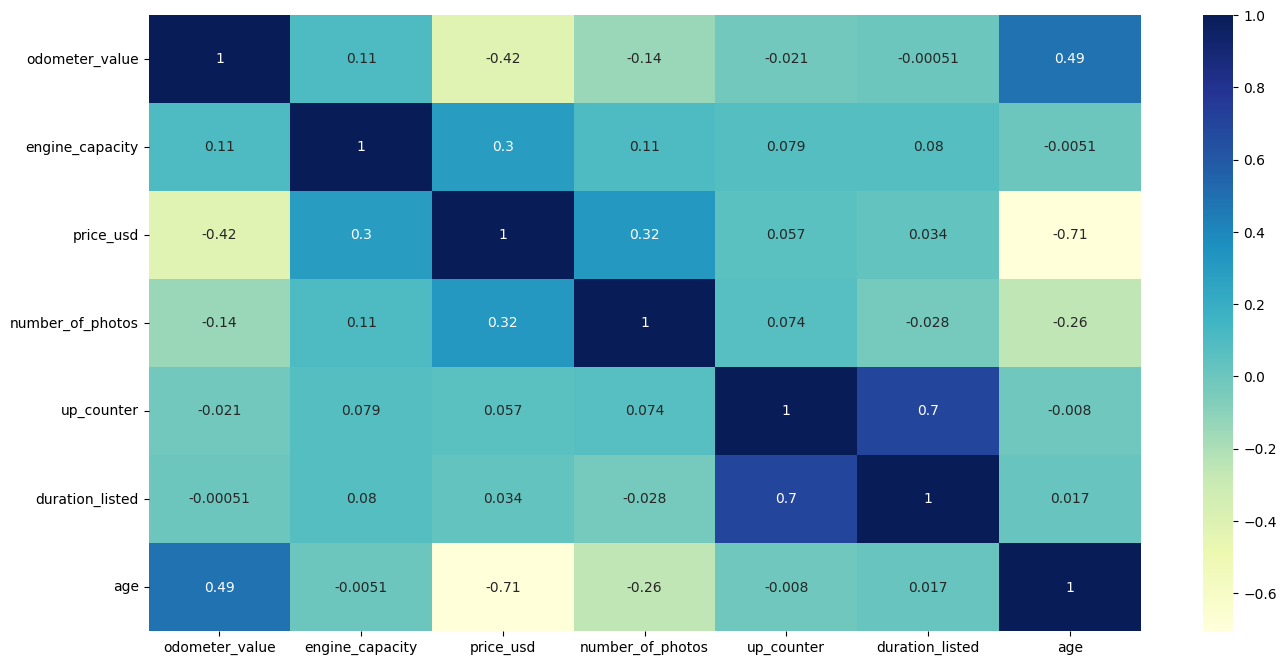

In [9]:
# Figure size
plt.figure(figsize=(16,8))
cor = cars_numeric.corr()
# Heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

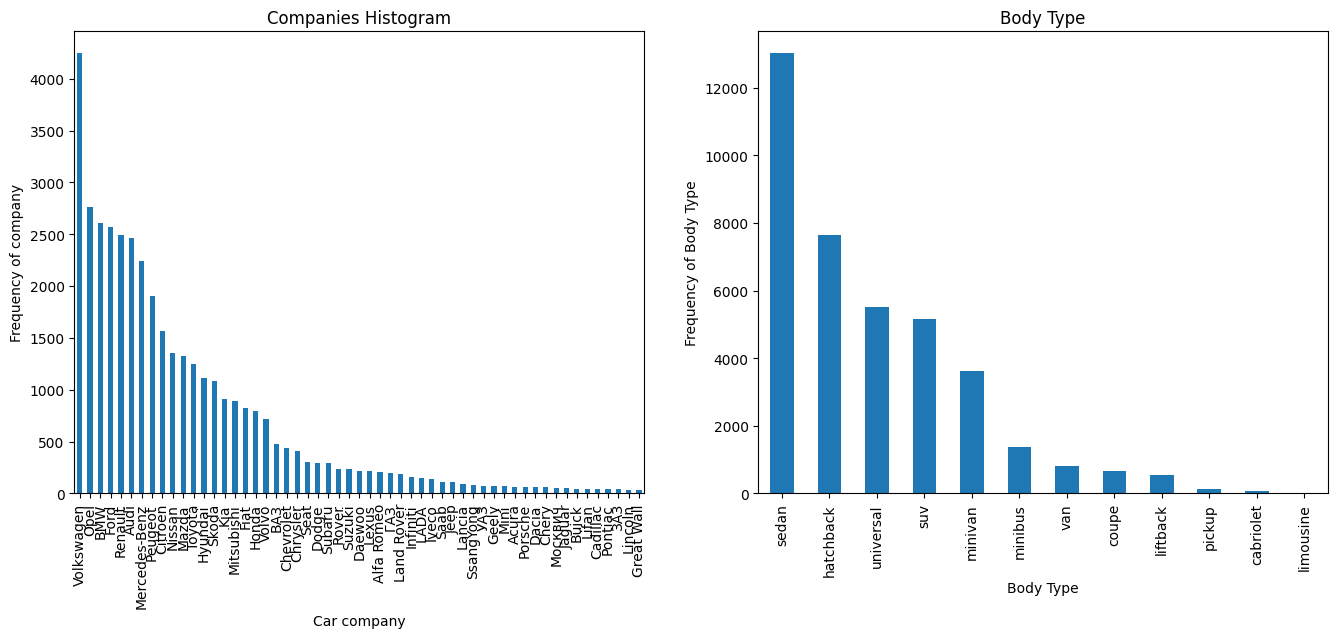

In [10]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = cars.manufacturer_name.value_counts().plot(kind='bar')
plt.title('Companies Histogram')
plt1.set(xlabel = 'Car company', ylabel='Frequency of company')

plt.subplot(1,3,2)
plt1 = cars.body_type.value_counts().plot(kind='bar')
plt.title('Body Type')
plt1.set(xlabel = 'Body Type', ylabel='Frequency of Body Type')

plt.show()

<Figure size 3000x1000 with 0 Axes>

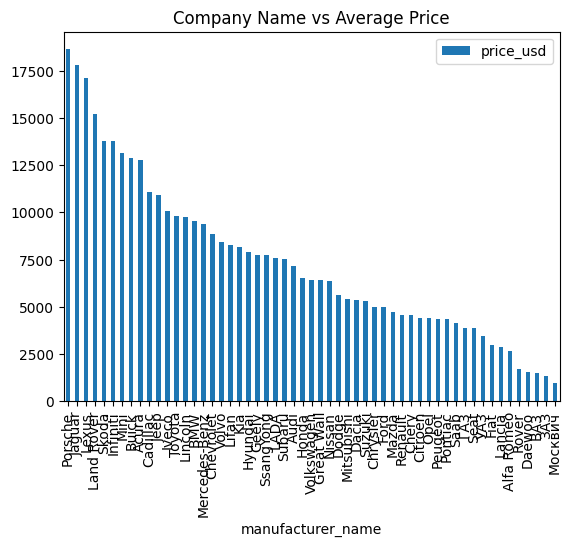

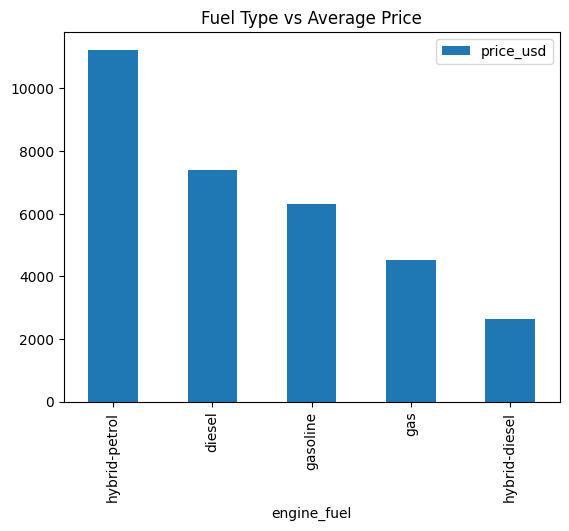

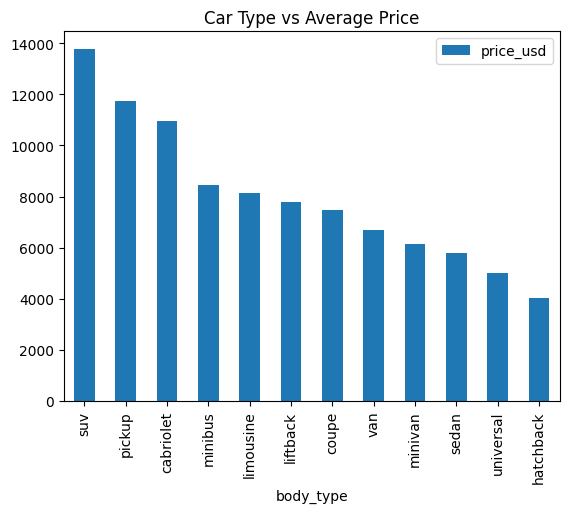

In [11]:
plt.figure(figsize=(30, 10))

df = pd.DataFrame(cars.groupby(['manufacturer_name'])['price_usd'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Company Name vs Average Price')
plt.show()

df = pd.DataFrame(cars.groupby(['engine_fuel'])['price_usd'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Fuel Type vs Average Price')
plt.show()

df = pd.DataFrame(cars.groupby(['body_type'])['price_usd'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Car Type vs Average Price')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

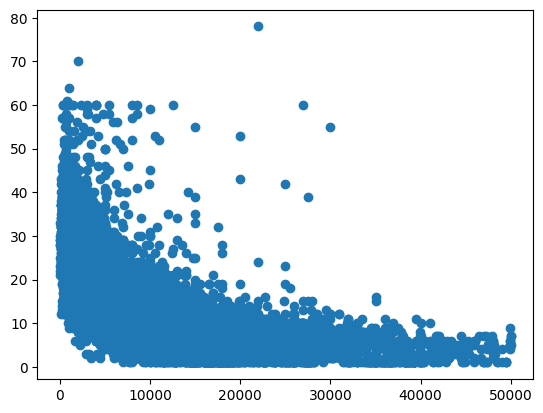

In [12]:
x=cars["price_usd"]
y=cars["age"]
plt.scatter(x,y)
plt.show

In [13]:
cars['price_usd'].describe()

count    38521.000000
mean      6637.160884
std       6425.198996
min          1.000000
25%       2100.000000
50%       4800.000000
75%       8950.000000
max      50000.000000
Name: price_usd, dtype: float64

In [16]:
cars.head()

,manufacturer_name,model_name,transmission,color,odometer_value,engine_fuel,engine_has_gas,engine_capacity,body_type,has_warranty,state,drivetrain,price_usd,is_exchangeable,location_region,number_of_photos,up_counter,duration_listed,age
0,Subaru,Outback,automatic,silver,190000,gasoline,False,2.5,universal,False,owned,all,10900.00,False,Минская обл.,9,13,16,10
1,Subaru,Outback,automatic,blue,290000,gasoline,False,3.0,universal,False,owned,all,5000.00,True,Минская обл.,12,54,83,18
2,Subaru,Forester,automatic,red,402000,gasoline,False,2.5,suv,False,owned,all,2800.00,True,Минская обл.,4,72,151,19
3,Subaru,Impreza,mechanical,blue,10000,gasoline,False,3.0,sedan,False,owned,all,9999.00,True,Минская обл.,9,42,86,21
4,Subaru,Legacy,automatic,black,280000,gasoline,False,2.5,universal,False,owned,all,2134.11,True,Гомельская обл.,14,7,7,19


In [17]:
cars.dtypes

manufacturer_name     object
model_name            object
transmission          object
color                 object
odometer_value         int64
engine_fuel           object
engine_has_gas          bool
engine_capacity      float64
body_type             object
has_warranty            bool
state                 object
drivetrain            object
price_usd            float64
is_exchangeable         bool
location_region       object
number_of_photos       int64
up_counter             int64
duration_listed        int64
age                    int64
dtype: object

## Processing

For preprocessing, we are going to fix a few issues in the dataset. 

- Next, we will encode the categorical features as integers (eventually we will deal with these integers like a one-hot encoding)
- Finally, we will make certain all the continuous data is scaled properly with zero mean and unit standard deviaiton

In [18]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# define objects that can encode each variable as integer    
encoders = dict() # save each encoder in dictionary
categorical_headers = ['manufacturer_name','model_name','transmission',
                       'color','engine_fuel','engine_has_gas','body_type', 'has_warranty','state','drivetrain','is_exchangeable','location_region']

# train all encoders (special case the target 'income')
for col in categorical_headers:
    if cars[col].dtype == 'object':
        cars[col] = cars[col].str.strip()
    
    # integer encode strings that are features
    encoders[col] = LabelEncoder() # save the encoder
    cars[col+'_int'] = encoders[col].fit_transform(cars[col])

# ========================================================
# scale the numeric, continuous variables
numeric_headers = ['odometer_value', 'engine_capacity', 'number_of_photos','up_counter','duration_listed','age', 'price_usd']
ss = StandardScaler()
cars[numeric_headers] = ss.fit_transform(cars[numeric_headers].values)

categorical_headers_ints = [x+'_int' for x in categorical_headers]

cars.head()

,manufacturer_name,model_name,transmission,color,odometer_value,engine_fuel,engine_has_gas,engine_capacity,body_type,has_warranty,state,drivetrain,price_usd,is_exchangeable,location_region,number_of_photos,up_counter,duration_listed,age,manufacturer_name_int,model_name_int,transmission_int,color_int,engine_fuel_int,engine_has_gas_int,body_type_int,has_warranty_int,state_int,drivetrain_int,is_exchangeable_int,location_region_int
0,Subaru,Outback,automatic,silver,-0.432979,gasoline,False,0.662782,universal,False,owned,all,0.663465,False,Минская обл.,-0.106366,-0.076380,-0.572370,-0.875318,45,763,0,8,2,0,10,0,2,0,0,4
1,Subaru,Outback,automatic,blue,0.302004,gasoline,False,1.407751,universal,False,owned,all,-0.254806,True,Минская обл.,0.386020,0.870694,0.021406,0.116665,45,763,0,1,2,0,10,0,2,0,1,4
2,Subaru,Forester,automatic,red,1.125184,gasoline,False,0.662782,suv,False,owned,all,-0.597213,True,Минская обл.,-0.927009,1.286483,0.624045,0.240663,45,519,0,7,2,0,9,0,2,0,1,4
3,Subaru,Impreza,mechanical,blue,-1.755946,gasoline,False,1.407751,sedan,False,owned,all,0.523234,True,Минская обл.,-0.106366,0.593502,0.047993,0.488659,45,609,1,1,2,0,8,0,2,0,1,4
4,Subaru,Legacy,automatic,black,0.228505,gasoline,False,0.662782,universal,False,owned,all,-0.700851,True,Гомельская обл.,0.714278,-0.214976,-0.652131,0.240663,45,664,0,0,2,0,10,0,2,0,1,2


In [19]:
import pprint
pp = pprint.PrettyPrinter(indent=4)
# we have the following lists now of data that we can use with our dataframes:
print("Numeric Headers:")
pp.pprint(numeric_headers) # normalized numeric data
print("\nCategorical String Headers:")
pp.pprint(categorical_headers) # string data
print("\nCategorical Headers, Encoded as Integer:")
pp.pprint(categorical_headers_ints) # string data encoded as an integer

Numeric Headers:
[   'odometer_value',
    'engine_capacity',
    'number_of_photos',
    'up_counter',
    'duration_listed',
    'age',
    'price_usd']

Categorical String Headers:
[   'manufacturer_name',
    'model_name',
    'transmission',
    'color',
    'engine_fuel',
    'engine_has_gas',
    'body_type',
    'has_warranty',
    'state',
    'drivetrain',
    'is_exchangeable',
    'location_region']

Categorical Headers, Encoded as Integer:
[   'manufacturer_name_int',
    'model_name_int',
    'transmission_int',
    'color_int',
    'engine_fuel_int',
    'engine_has_gas_int',
    'body_type_int',
    'has_warranty_int',
    'state_int',
    'drivetrain_int',
    'is_exchangeable_int',
    'location_region_int']


In [20]:
# we will forego one-hot encoding right now and instead just use all inputs as-is
#   this is just to get an example running in Keras (its not a good idea)
feature_columns = categorical_headers_ints+numeric_headers
feature_columns.remove('price_usd') #y_train&test

print(f"We will use the following {len(feature_columns)} features:")
pp.pprint(feature_columns)

We will use the following 18 features:
[   'manufacturer_name_int',
    'model_name_int',
    'transmission_int',
    'color_int',
    'engine_fuel_int',
    'engine_has_gas_int',
    'body_type_int',
    'has_warranty_int',
    'state_int',
    'drivetrain_int',
    'is_exchangeable_int',
    'location_region_int',
    'odometer_value',
    'engine_capacity',
    'number_of_photos',
    'up_counter',
    'duration_listed',
    'age']


In [21]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(cars, test_size=0.2, random_state=42)
# combine the features into a single large matrix
X_train = df_train[feature_columns].to_numpy()
X_test = df_test[feature_columns].to_numpy()

y_train = df_train['price_usd'].values.astype(np.int32)
y_test = df_test['price_usd'].values.astype(np.int32)

In [22]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(30816, 18)
(30816,)
(7705, 18)
(7705,)


In [23]:
from sklearn import metrics as mt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Input
from tensorflow.keras.models import Model

## Embedding

## MODEL 1 WITH ADDED LAYERS

In [24]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import concatenate
from tensorflow.keras.metrics import MeanAbsoluteError
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.layers import BatchNormalization, Dropout
from tensorflow.keras.regularizers import l2

embed_branches = []
all_branch_outputs = [] # this is where we will keep track of output of each branch

# feed in the entire matrix of categircal variables
input_branch = Input(shape=(X_train.shape[1],), 
                     dtype='int64', 
                     name='categorical')

#Define a learning rate schedule
initial_learning_rate = 0.01
lr_schedule = ExponentialDecay(
    initial_learning_rate, decay_steps=100, decay_rate=0.9
)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

# for each categorical variable
for idx,col in enumerate(categorical_headers_ints):
    
    # what the maximum integer value for this variable?
    # which is the same as the number of categories
    # these lines of code do the same thing
    N = max(df_train[col].max(),df_test[col].max())+1
    N = len(encoders[categorical_headers[idx]].classes_)
    
    # this line of code does this: input_branch[:,idx]
    x = tf.gather(input_branch, idx, axis=1)
    
    # now use an embedding to deal with integers as if they were one hot encoded
    x = Embedding(input_dim=N, 
                  output_dim=int(np.sqrt(N)), 
                  input_length=1, name=col+'_embed')(x)
    
    # save these outputs in list to concatenate later
    all_branch_outputs.append(x)
    
# now concatenate the outputs and add a fully connected layer
branch = concatenate(all_branch_outputs, name='concat_1')
branch = Dense(units=64, activation='relu', name='combined')(branch)

x = Dense(units=256, activation='relu')(branch) #increases width
x = BatchNormalization()(x)
x = Dense(units=128, activation='relu')(x)  #increases width
x = Dropout(0.3)(x)
x = Dense(units=64, activation='relu', kernel_regularizer=l2(0.01))(x)  #increases width

# Add the final output layer
final_output = Dense(units=1, name='output')(x)

model = Model(inputs=input_branch, outputs=final_output)

model.compile(optimizer=optimizer,
              loss='mean_squared_error',
              metrics=[MeanAbsoluteError()])

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 categorical (InputLayer)    [(None, 18)]                 0         []                            
                                                                                                  
 tf.compat.v1.gather (TFOpL  (None,)                      0         ['categorical[0][0]']         
 ambda)                                                                                           
                                                                                                  
 tf.compat.v1.gather_1 (TFO  (None,)                      0         ['categorical[0][0]']         
 pLambda)                                                                                         
                                                                                              

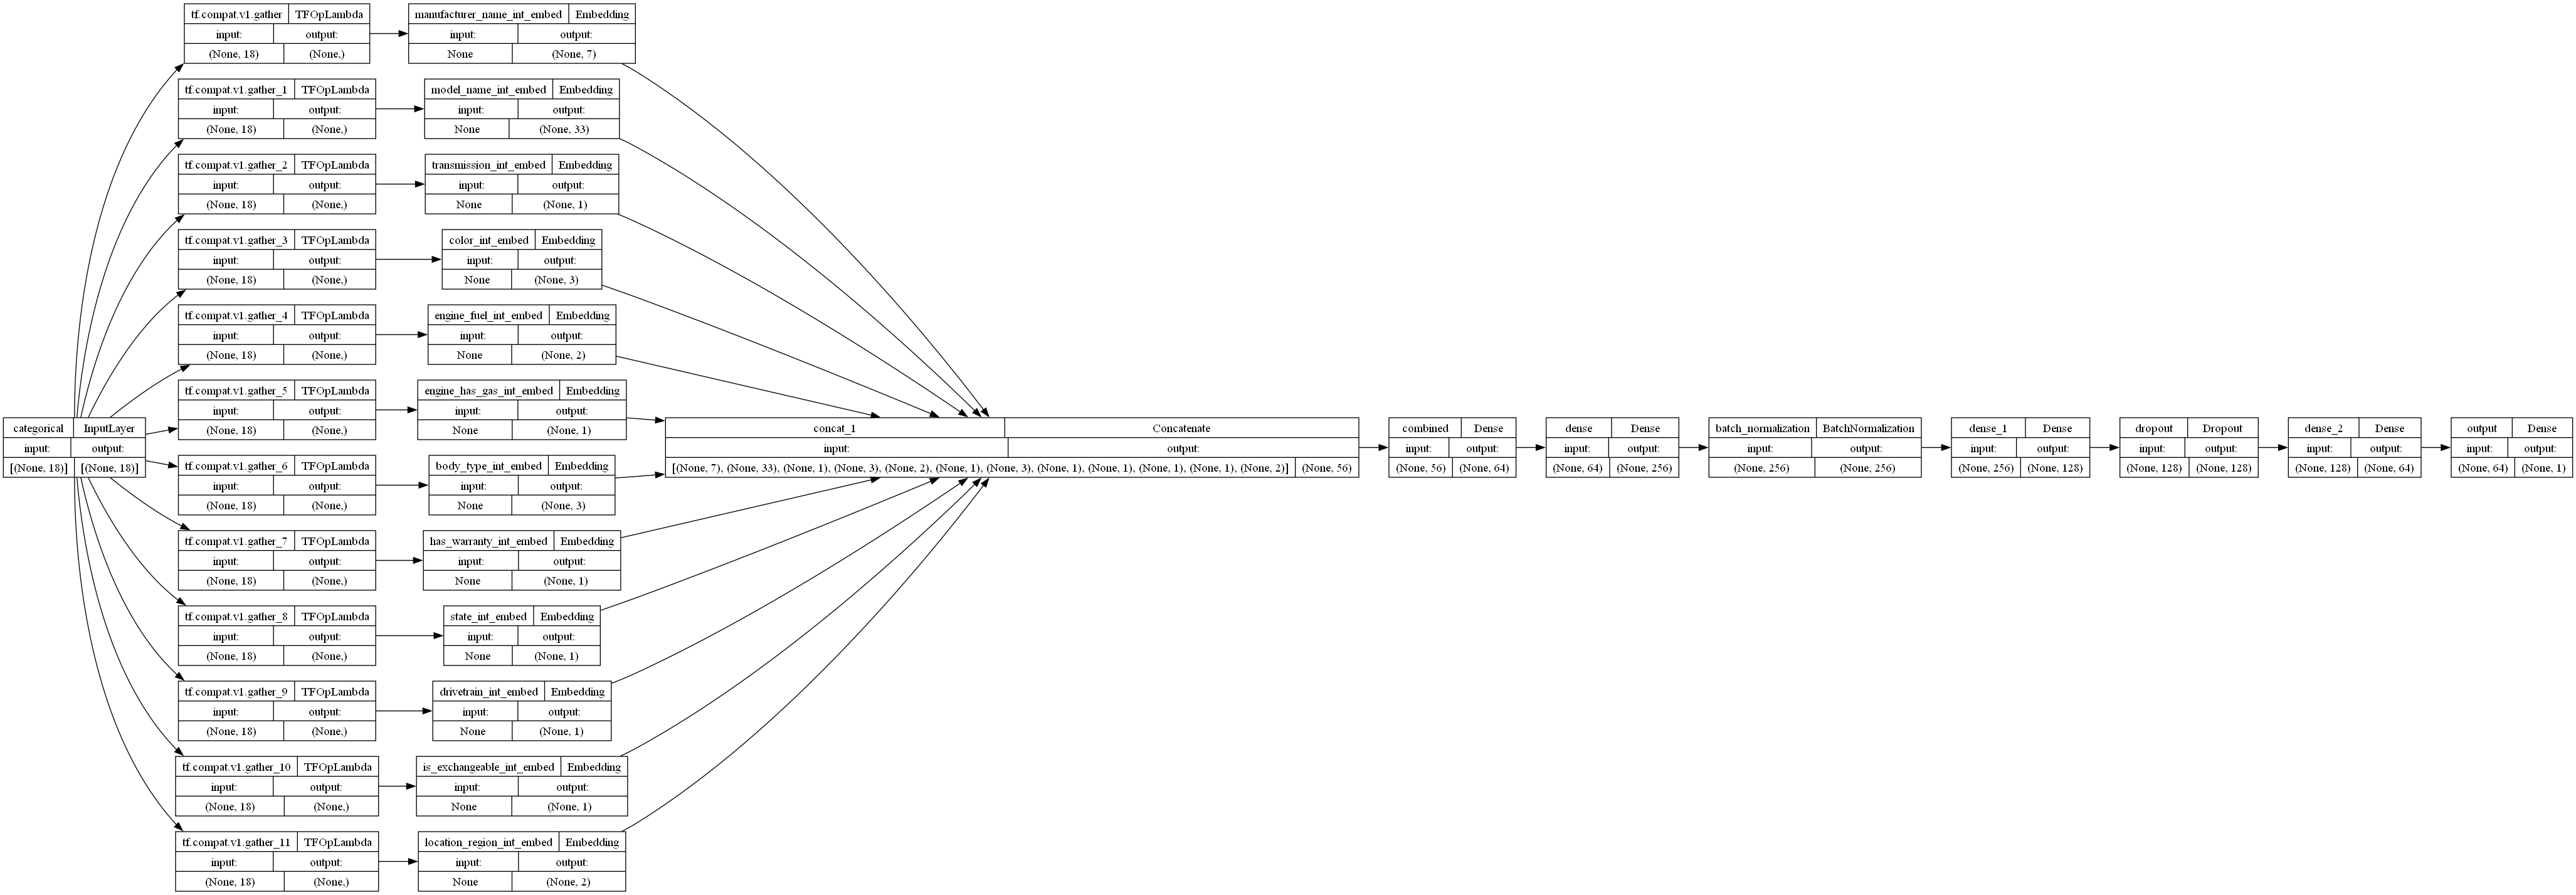

In [25]:
keras.utils.plot_model(model, show_shapes=True, rankdir="LR")

In [26]:
%%time
from sklearn.metrics import mean_squared_error, mean_absolute_error

model.fit(X_train, y_train, epochs=10, batch_size=50, verbose=1)

yhat = model.predict(X_test)
mse = mean_squared_error(y_test, yhat)
mae = mean_absolute_error(y_test, yhat)
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

Epoch 1/10
617/617 [==============================] - 4s 3ms/step - loss: 0.3131 - mean_absolute_error: 0.2461
Epoch 2/10
617/617 [==============================] - 2s 2ms/step - loss: 0.2208 - mean_absolute_error: 0.2075
Epoch 3/10
617/617 [==============================] - 2s 2ms/step - loss: 0.1955 - mean_absolute_error: 0.1935
Epoch 4/10
617/617 [==============================] - 1s 2ms/step - loss: 0.1809 - mean_absolute_error: 0.1842
Epoch 5/10
617/617 [==============================] - 2s 2ms/step - loss: 0.1686 - mean_absolute_error: 0.1771
Epoch 6/10
617/617 [==============================] - 2s 2ms/step - loss: 0.1626 - mean_absolute_error: 0.1726
Epoch 7/10
617/617 [==============================] - 2s 2ms/step - loss: 0.1593 - mean_absolute_error: 0.1702
Epoch 8/10
617/617 [==============================] - 2s 2ms/step - loss: 0.1587 - mean_absolute_error: 0.1693
Epoch 9/10
617/617 [==============================] - 2s 2ms/step - loss: 0.1577 - mean_absolute_error: 0.1685
E

## MODEL 2: NUMERIC AND CATEGORICAL

In [27]:
# save categorical features
X_train_cat = df_train[categorical_headers_ints].to_numpy() 
X_test_cat = df_test[categorical_headers_ints].to_numpy() 

# and save off the numeric features
X_train_num =  df_train[numeric_headers].to_numpy()
X_test_num = df_test[numeric_headers].to_numpy()

all_branch_outputs = [] # this is where we will keep track of output of each branch

# -----Like previous example, use embeddings from the integer data -----
input_cat = Input(shape=(X_train_cat.shape[1],), dtype='int64', name='categorical')
for idx,col in enumerate(categorical_headers_ints):
    
    # track what the maximum integer value will be for this variable
    # which is the same as the number of categories
    N = max(df_train[col].max(),df_test[col].max())+1
    N = len(encoders[categorical_headers[idx]].classes_)
    N_reduced = int(np.sqrt(N))
    
    # this line of code does this: input_branch[:,idx]
    x = tf.gather(input_cat, idx, axis=1)
    
    # now use an embedding to deal with integers as if they were one hot encoded
    x = Embedding(input_dim=N, 
                  output_dim=N_reduced, 
                  input_length=1, name=col+'_embed')(x)
    
    # save these outputs to concatenate later
    all_branch_outputs.append(x)
    
# -----HERE IS THE ADDING OF AN INPUT USING NUMERIC DATA-----
# create dense input branch for numeric
inputs_num = Input(shape=(X_train_num.shape[1],), name='numeric')
x_dense = Dense(units=9, activation='relu', name='num_1')(inputs_num)
    
all_branch_outputs.append(x_dense)
# -------------------------------------------------------------------

# now concatenate the outputs and add a fully connected layer
final_branch = concatenate(all_branch_outputs, name='concat_1')
final_branch = Dense(units=10, activation='relu', name='combined_1')(final_branch)
final_branch = Dense(units=1, activation='sigmoid', name='combined_2')(final_branch)

model2 = Model(inputs=[input_cat,inputs_num], outputs=final_branch)

#Define a learning rate schedule
initial_learning_rate = 0.01
lr_schedule = ExponentialDecay(
    initial_learning_rate, decay_steps=100, decay_rate=0.9
)
optimizer2 = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
model2.compile(optimizer=optimizer2,
              loss='mean_squared_error',
              metrics=[MeanAbsoluteError()])

model2.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 categorical (InputLayer)    [(None, 12)]                 0         []                            
                                                                                                  
 tf.compat.v1.gather_12 (TF  (None,)                      0         ['categorical[0][0]']         
 OpLambda)                                                                                        
                                                                                                  
 tf.compat.v1.gather_13 (TF  (None,)                      0         ['categorical[0][0]']         
 OpLambda)                                                                                        
                                                                                            

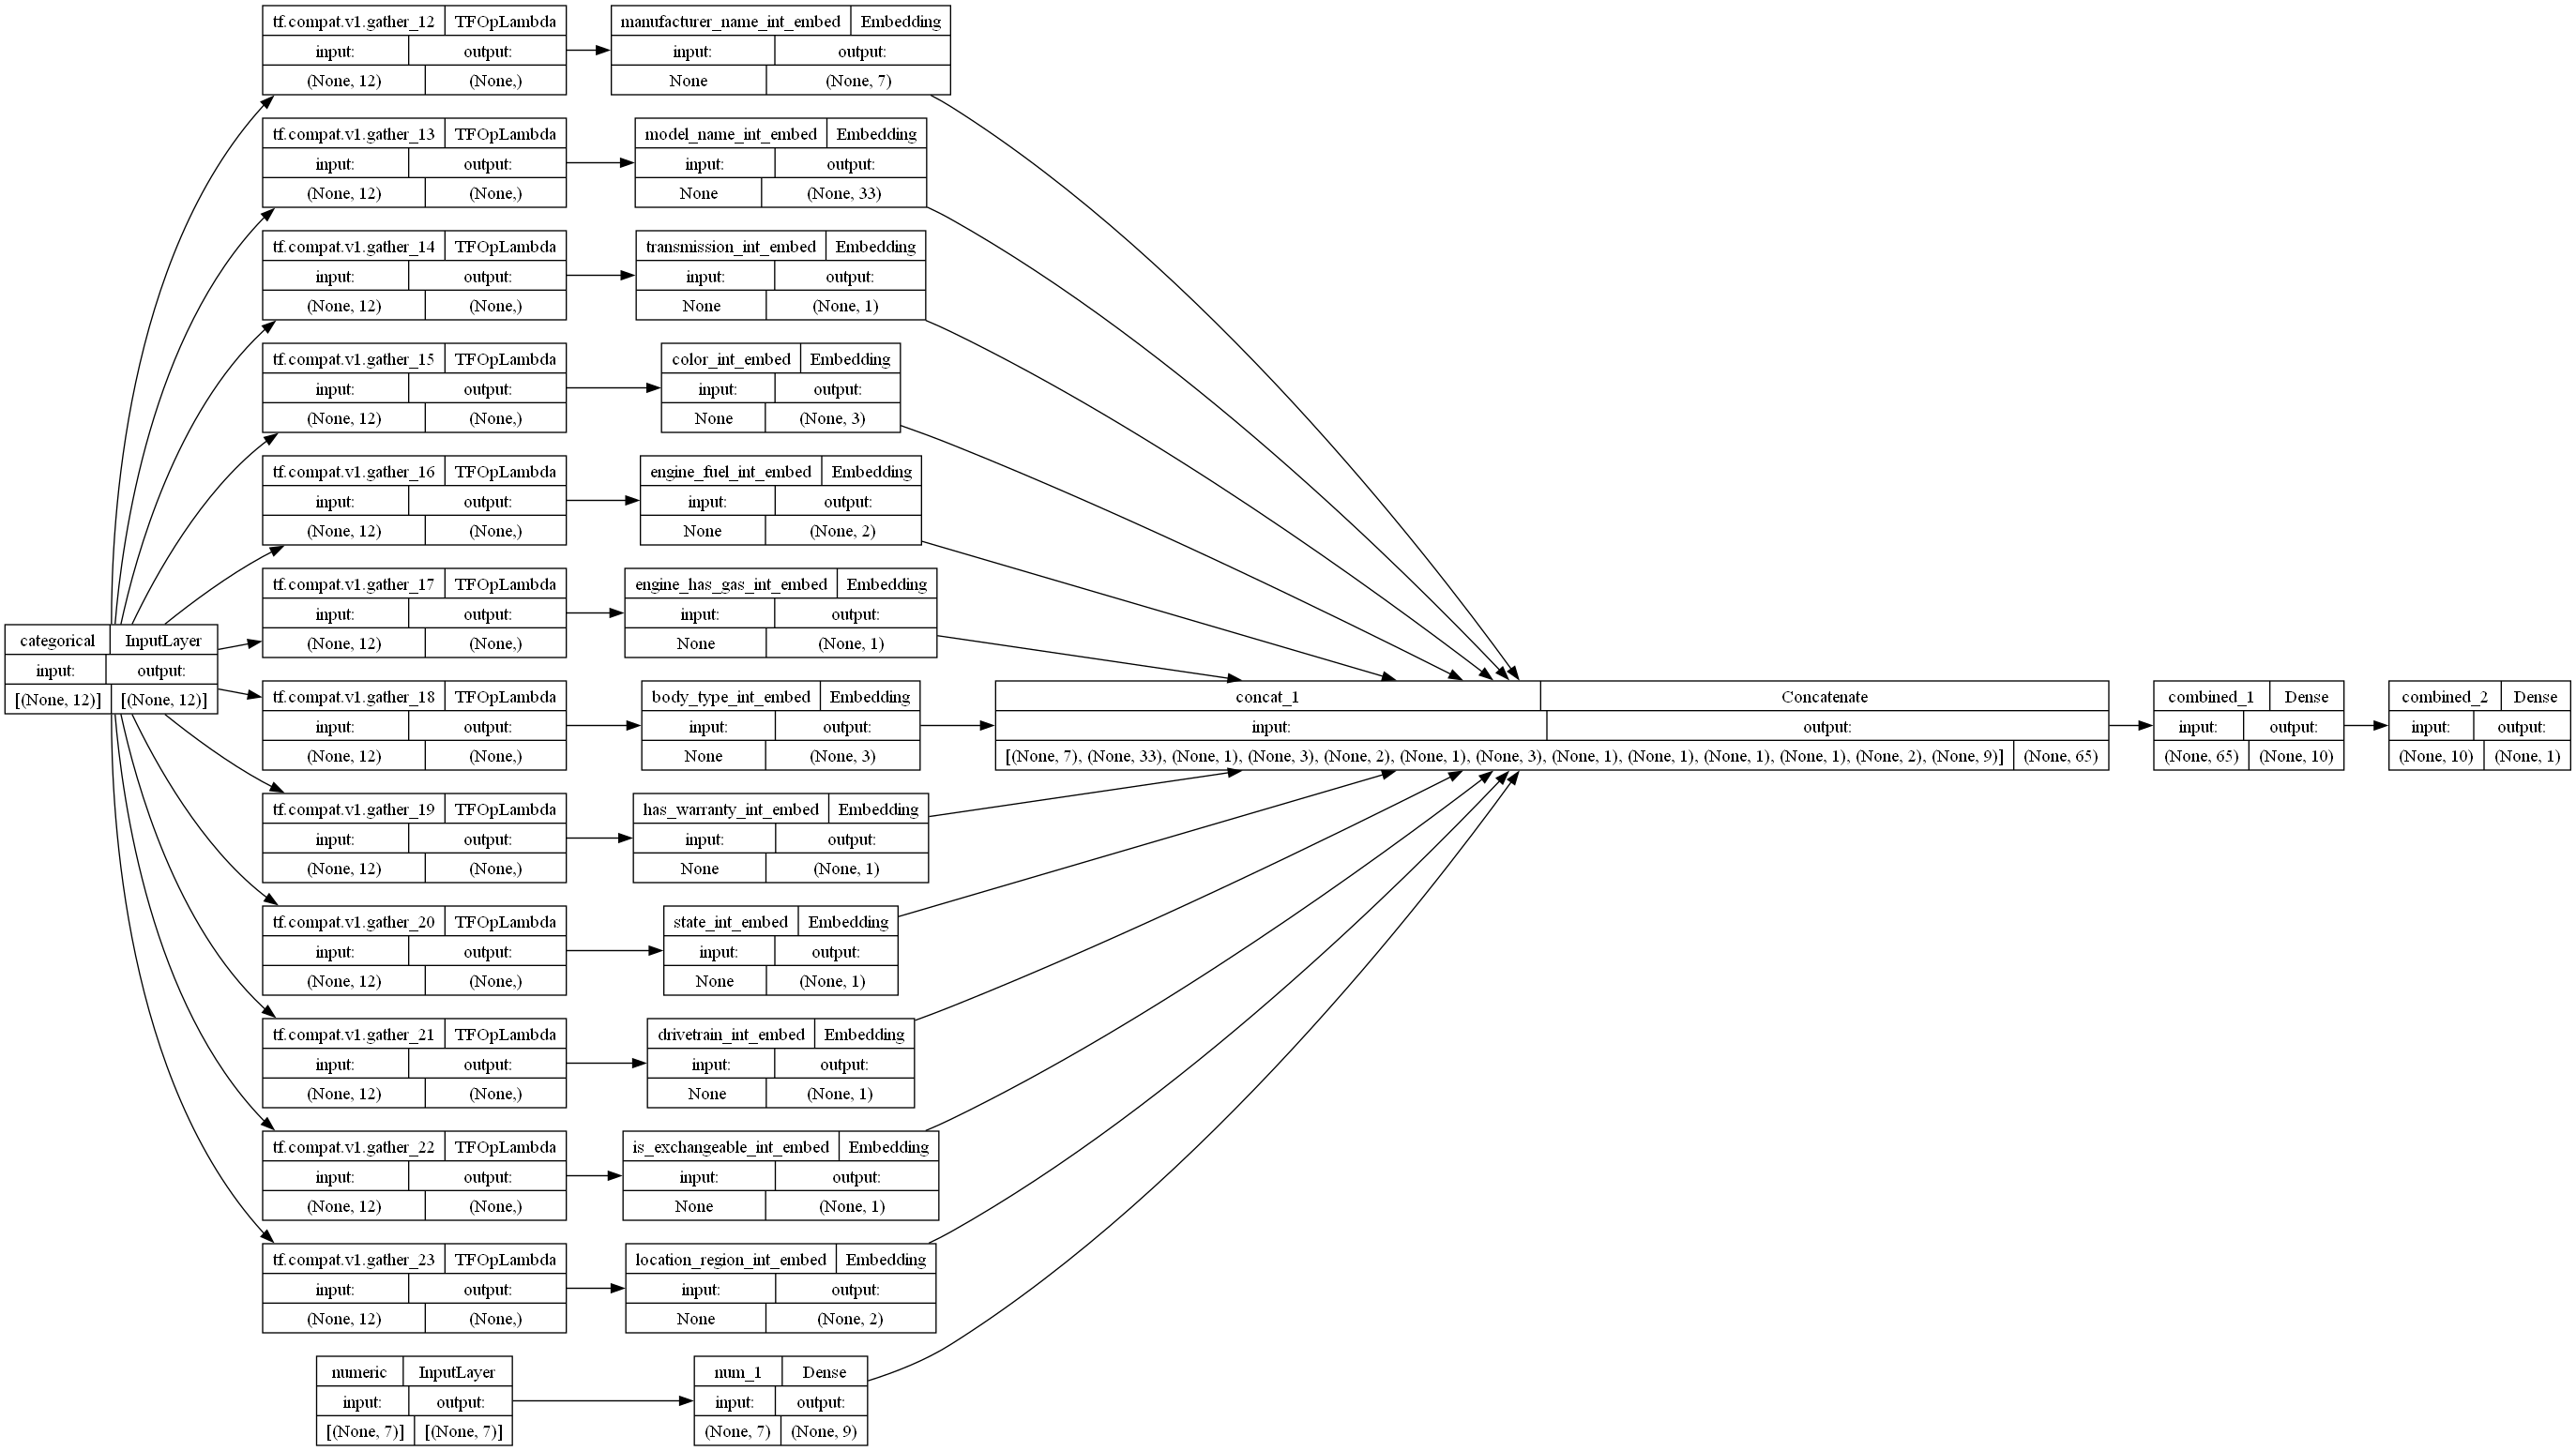

In [28]:
keras.utils.plot_model(model2, show_shapes=True, rankdir="LR")

In [29]:
%%time

model2.fit([X_train_cat, X_train_num], y_train, epochs=10, batch_size=50, verbose=1)

yhat = model2.predict([X_test_cat,X_test_num])
mse = mean_squared_error(y_test, yhat)
mae = mean_absolute_error(y_test, yhat)
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

Epoch 1/10
617/617 [==============================] - 2s 2ms/step - loss: 0.2169 - mean_absolute_error: 0.1174
Epoch 2/10
617/617 [==============================] - 1s 1ms/step - loss: 0.2053 - mean_absolute_error: 0.0946
Epoch 3/10
617/617 [==============================] - 1s 1ms/step - loss: 0.2034 - mean_absolute_error: 0.0910
Epoch 4/10
617/617 [==============================] - 1s 2ms/step - loss: 0.2028 - mean_absolute_error: 0.0896
Epoch 5/10
617/617 [==============================] - 1s 1ms/step - loss: 0.2024 - mean_absolute_error: 0.0890
Epoch 6/10
617/617 [==============================] - 1s 1ms/step - loss: 0.2022 - mean_absolute_error: 0.0885
Epoch 7/10
617/617 [==============================] - 1s 1ms/step - loss: 0.2021 - mean_absolute_error: 0.0883
Epoch 8/10
617/617 [==============================] - 1s 2ms/step - loss: 0.2021 - mean_absolute_error: 0.0882
Epoch 9/10
617/617 [==============================] - 1s 2ms/step - loss: 0.2020 - mean_absolute_error: 0.0881
E

## MAKING CROSSED COLUMNS

In [30]:
# sandbox for looking at different categorical variables
for col in categorical_headers:
    vals = df_train[col].unique()
    print(col,'has', len(vals), 'unique values:')
    print(vals)

manufacturer_name has 55 unique values:
['Renault' 'Hyundai' 'Peugeot' 'SsangYong' 'Skoda' 'Mazda' 'Opel' 'Kia'
 'BMW' 'Fiat' 'Volkswagen' 'Daewoo' 'Honda' 'Volvo' 'Mercedes-Benz'
 'Nissan' 'Toyota' 'Land Rover' 'Ford' 'Seat' 'Chrysler' 'ВАЗ'
 'Mitsubishi' 'Pontiac' 'Suzuki' 'Citroen' 'Audi' 'Jeep' 'Geely' 'ЗАЗ'
 'Dodge' 'Porsche' 'Alfa Romeo' 'Iveco' 'ГАЗ' 'Chevrolet' 'LADA' 'Subaru'
 'Jaguar' 'Chery' 'Rover' 'Lexus' 'Dacia' 'Saab' 'Москвич' 'Cadillac'
 'Lancia' 'Mini' 'Infiniti' 'Lincoln' 'Acura' 'УАЗ' 'Great Wall' 'Buick'
 'Lifan']
model_name has 1074 unique values:
['Kangoo' 'Santa Fe' '3008' ... 'S600' '2402' 'Cebrium']
transmission has 2 unique values:
['mechanical' 'automatic']
color has 12 unique values:
['blue' 'white' 'black' 'green' 'yellow' 'grey' 'silver' 'red' 'other'
 'brown' 'violet' 'orange']
engine_fuel has 5 unique values:
['diesel' 'gasoline' 'gas' 'hybrid-petrol' 'hybrid-diesel']
engine_has_gas has 2 unique values:
[False  True]
body_type has 12 unique values:
['un

In [31]:
cross_columns = [ ['manufacturer_name','color'],
                 ['manufacturer_name','engine_fuel','transmission','state'],
                ['color','body_type'],
                #['state','is_exchangeable'],
                ['state','engine_fuel'] ]

# cross each set of columns in the list above
cross_col_df_names = []
for cols_list in cross_columns:
    # encode as ints for the embedding
    enc = LabelEncoder()
    
    # 1. create crossed labels by join operation
    X_crossed_train = df_train[cols_list].apply(lambda x: '_'.join(x), axis=1)
    X_crossed_test = df_test[cols_list].apply(lambda x: '_'.join(x), axis=1)
    
    # get a nice name for this new crossed column
    cross_col_name = '_'.join(cols_list)
    
    # 2. encode as integers, stacking all possibilities
    enc.fit(np.hstack((X_crossed_train.to_numpy(),  X_crossed_test.to_numpy())))
    
    # 3. Save into dataframe with new name
    df_train[cross_col_name] = enc.transform(X_crossed_train)
    df_test[cross_col_name] = enc.transform(X_crossed_test)
    
    # Save the encoder used here for later:
    encoders[cross_col_name] = enc
    
    # keep track of the new names of the crossed columns
    cross_col_df_names.append(cross_col_name) 
    
cross_col_df_names

['manufacturer_name_color',
 'manufacturer_name_engine_fuel_transmission_state',
 'color_body_type',
 'state_engine_fuel']

## MODEL 3: ONLY USING CROSSED COLUMNS

In [32]:
# Train a model only using crossed values
# get crossed columns
X_train_crossed = df_train[cross_col_df_names].to_numpy()
X_test_crossed = df_test[cross_col_df_names].to_numpy()

crossed_outputs = [] # this is where we will keep track of output of each branch

input_crossed = Input(shape=(X_train_crossed.shape[1],), dtype='int64', name='categorical')
for idx,col in enumerate(cross_col_df_names):
    
    # track what the maximum integer value will be for this variable
    # which is the same as the number of categories
    N = max(df_train[col].max(),df_test[col].max())+1
    N = len(encoders[col].classes_)
    N_reduced = int(np.sqrt(N))
    
    # this line of code does this: input_branch[:,idx]
    x = tf.gather(input_crossed, idx, axis=1)
    
    # now use an embedding to deal with integers as if they were one hot encoded
    x = Embedding(input_dim=N, 
                  output_dim=N_reduced, 
                  input_length=1, name=col+'_embed')(x)
    
    # save these outputs to concatenate later
    crossed_outputs.append(x)
    

# now concatenate the outputs and add a fully connected layer
wide_branch = concatenate(crossed_outputs, name='concat_1')
wide_branch = Dense(units=1,activation='sigmoid', name='combined')(wide_branch)

model3 = Model(inputs=input_crossed, outputs=wide_branch)

#Define a learning rate schedule
initial_learning_rate = 0.01
lr_schedule = ExponentialDecay(
    initial_learning_rate, decay_steps=100, decay_rate=0.9
)
optimizer3 = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
model3.compile(optimizer=optimizer3,
              loss='mean_squared_error',
              metrics=[MeanAbsoluteError()])

model3.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 categorical (InputLayer)    [(None, 4)]                  0         []                            
                                                                                                  
 tf.compat.v1.gather_24 (TF  (None,)                      0         ['categorical[0][0]']         
 OpLambda)                                                                                        
                                                                                                  
 tf.compat.v1.gather_25 (TF  (None,)                      0         ['categorical[0][0]']         
 OpLambda)                                                                                        
                                                                                            

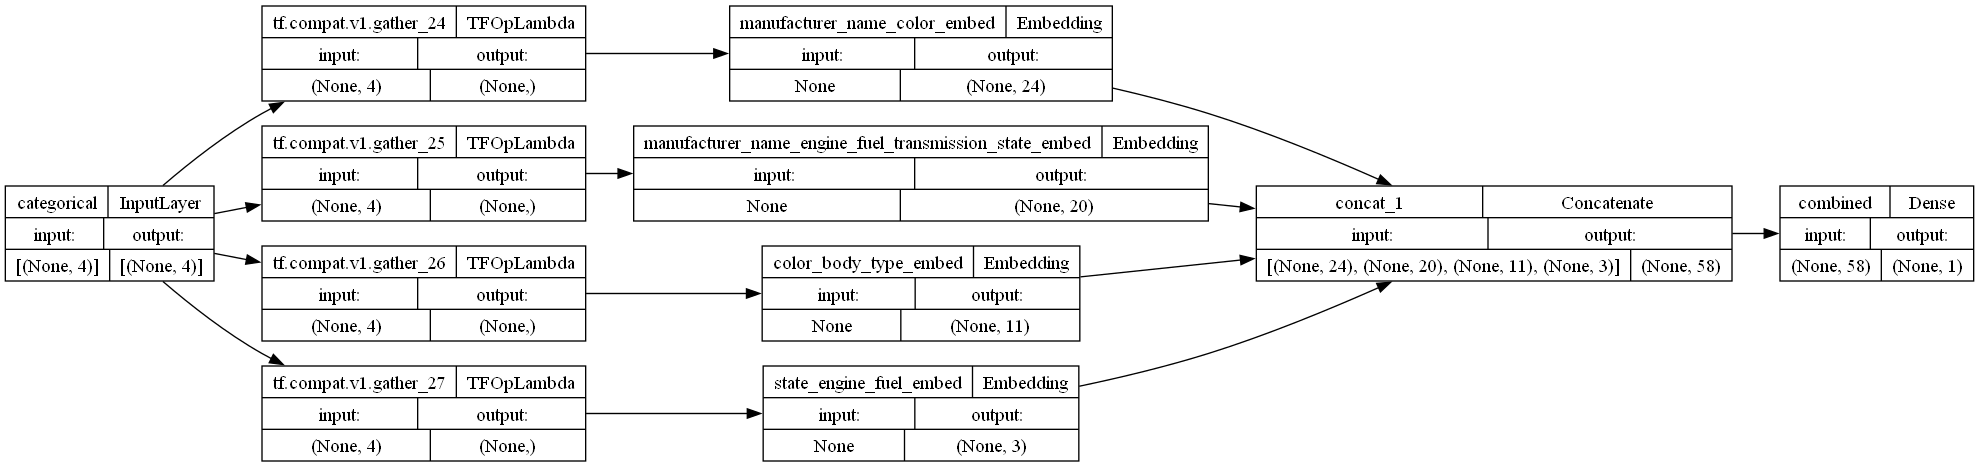

In [33]:
keras.utils.plot_model(model3, show_shapes=True, rankdir="LR")

In [34]:
model3.fit(X_train_crossed, y_train, epochs=10, batch_size=32, verbose=1)

yhat = model3.predict(X_test_crossed)
mse = mean_squared_error(y_test, yhat)
mae = mean_absolute_error(y_test, yhat)
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

Epoch 1/10
963/963 [==============================] - 2s 982us/step - loss: 0.3268 - mean_absolute_error: 0.2288
Epoch 2/10
963/963 [==============================] - 1s 955us/step - loss: 0.3095 - mean_absolute_error: 0.2117
Epoch 3/10
963/963 [==============================] - 1s 952us/step - loss: 0.3054 - mean_absolute_error: 0.2089
Epoch 4/10
963/963 [==============================] - 1s 965us/step - loss: 0.3037 - mean_absolute_error: 0.2061
Epoch 5/10
963/963 [==============================] - 1s 959us/step - loss: 0.3030 - mean_absolute_error: 0.2057
Epoch 6/10
963/963 [==============================] - 1s 977us/step - loss: 0.3028 - mean_absolute_error: 0.2054
Epoch 7/10
963/963 [==============================] - 1s 950us/step - loss: 0.3027 - mean_absolute_error: 0.2054
Epoch 8/10
963/963 [==============================] - 1s 1ms/step - loss: 0.3026 - mean_absolute_error: 0.2054
Epoch 9/10
963/963 [==============================] - 1s 1ms/step - loss: 0.3026 - mean_absolute_e

## MODEL 4: CROSSED CATEGORICAL AND NUMERIC (DEEP & WIDE?)

In [35]:
# get crossed columns
X_train_crossed = df_train[cross_col_df_names].to_numpy()
X_test_crossed = df_test[cross_col_df_names].to_numpy()

# save categorical features
X_train_cat = df_train[categorical_headers_ints].to_numpy() 
X_test_cat = df_test[categorical_headers_ints].to_numpy() 

# and save off the numeric features
X_train_num =  df_train[numeric_headers].to_numpy()
X_test_num = df_test[numeric_headers].to_numpy()


# we need to create separate lists for each branch
crossed_outputs = []

# CROSSED DATA INPUT
input_crossed = Input(shape=(X_train_crossed.shape[1],), dtype='int64', name='wide_inputs')
for idx,col in enumerate(cross_col_df_names):
    
    # track what the maximum integer value will be for this variable
    # which is the same as the number of categories
    N = max(df_train[col].max(),df_test[col].max())+1
    N = len(encoders[col].classes_)
    N_reduced = int(np.sqrt(N))
    
    
    # this line of code does this: input_branch[:,idx]
    x = tf.gather(input_crossed, idx, axis=1)
    
    # now use an embedding to deal with integers as if they were one hot encoded
    x = Embedding(input_dim=N, 
                  output_dim=N_reduced, 
                  input_length=1, name=col+'_embed')(x)
    
    # save these outputs to concatenate later
    crossed_outputs.append(x)
    

# now concatenate the outputs and add a fully connected layer
wide_branch = concatenate(crossed_outputs, name='wide_concat')

# reset this input branch
all_deep_branch_outputs = []

# CATEGORICAL DATA INPUT
input_cat = Input(shape=(X_train_cat.shape[1],), dtype='int64', name='categorical_input')
for idx,col in enumerate(categorical_headers_ints):
    
    # track what the maximum integer value will be for this variable
    # which is the same as the number of categories
    N = max(df_train[col].max(),df_test[col].max())+1
    N_reduced = int(np.sqrt(N))
    
    # this line of code does this: input_branch[:,idx]
    x = tf.gather(input_cat, idx, axis=1)
    
    # now use an embedding to deal with integers as if they were one hot encoded
    x = Embedding(input_dim=N, 
                  output_dim=N_reduced, 
                  input_length=1, name=col+'_embed')(x)
    
    # save these outputs to concatenate later
    all_deep_branch_outputs.append(x)
    
# NUMERIC DATA INPUT
# create dense input branch for numeric
input_num = Input(shape=(X_train_num.shape[1],), name='numeric')
x_dense = Dense(units=20, activation='relu',name='num_1')(input_num)
    
all_deep_branch_outputs.append(x_dense)


# merge the deep branches together
deep_branch = concatenate(all_deep_branch_outputs,name='concat_embeds')
deep_branch = Dense(units=50,activation='relu', name='deep1')(deep_branch)
deep_branch = Dense(units=25,activation='relu', name='deep2')(deep_branch)
deep_branch = Dense(units=10,activation='relu', name='deep3')(deep_branch)
    
# merge the deep and wide branch
final_branch = concatenate([wide_branch, deep_branch],
                           name='concat_deep_wide')
final_branch = Dense(units=1,activation='sigmoid',
                     name='combined')(final_branch)

model4 = Model(inputs=[input_crossed,input_cat,input_num], outputs=final_branch)

#Define a learning rate schedule
initial_learning_rate = 0.01
lr_schedule = ExponentialDecay(
    initial_learning_rate, decay_steps=100, decay_rate=0.9
)
optimizer4 = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
model4.compile(optimizer=optimizer4,
              loss='mean_squared_error',
              metrics=[MeanAbsoluteError()])

model4.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 categorical_input (InputLa  [(None, 12)]                 0         []                            
 yer)                                                                                             
                                                                                                  
 tf.compat.v1.gather_32 (TF  (None,)                      0         ['categorical_input[0][0]']   
 OpLambda)                                                                                        
                                                                                                  
 tf.compat.v1.gather_33 (TF  (None,)                      0         ['categorical_input[0][0]']   
 OpLambda)                                                                                  

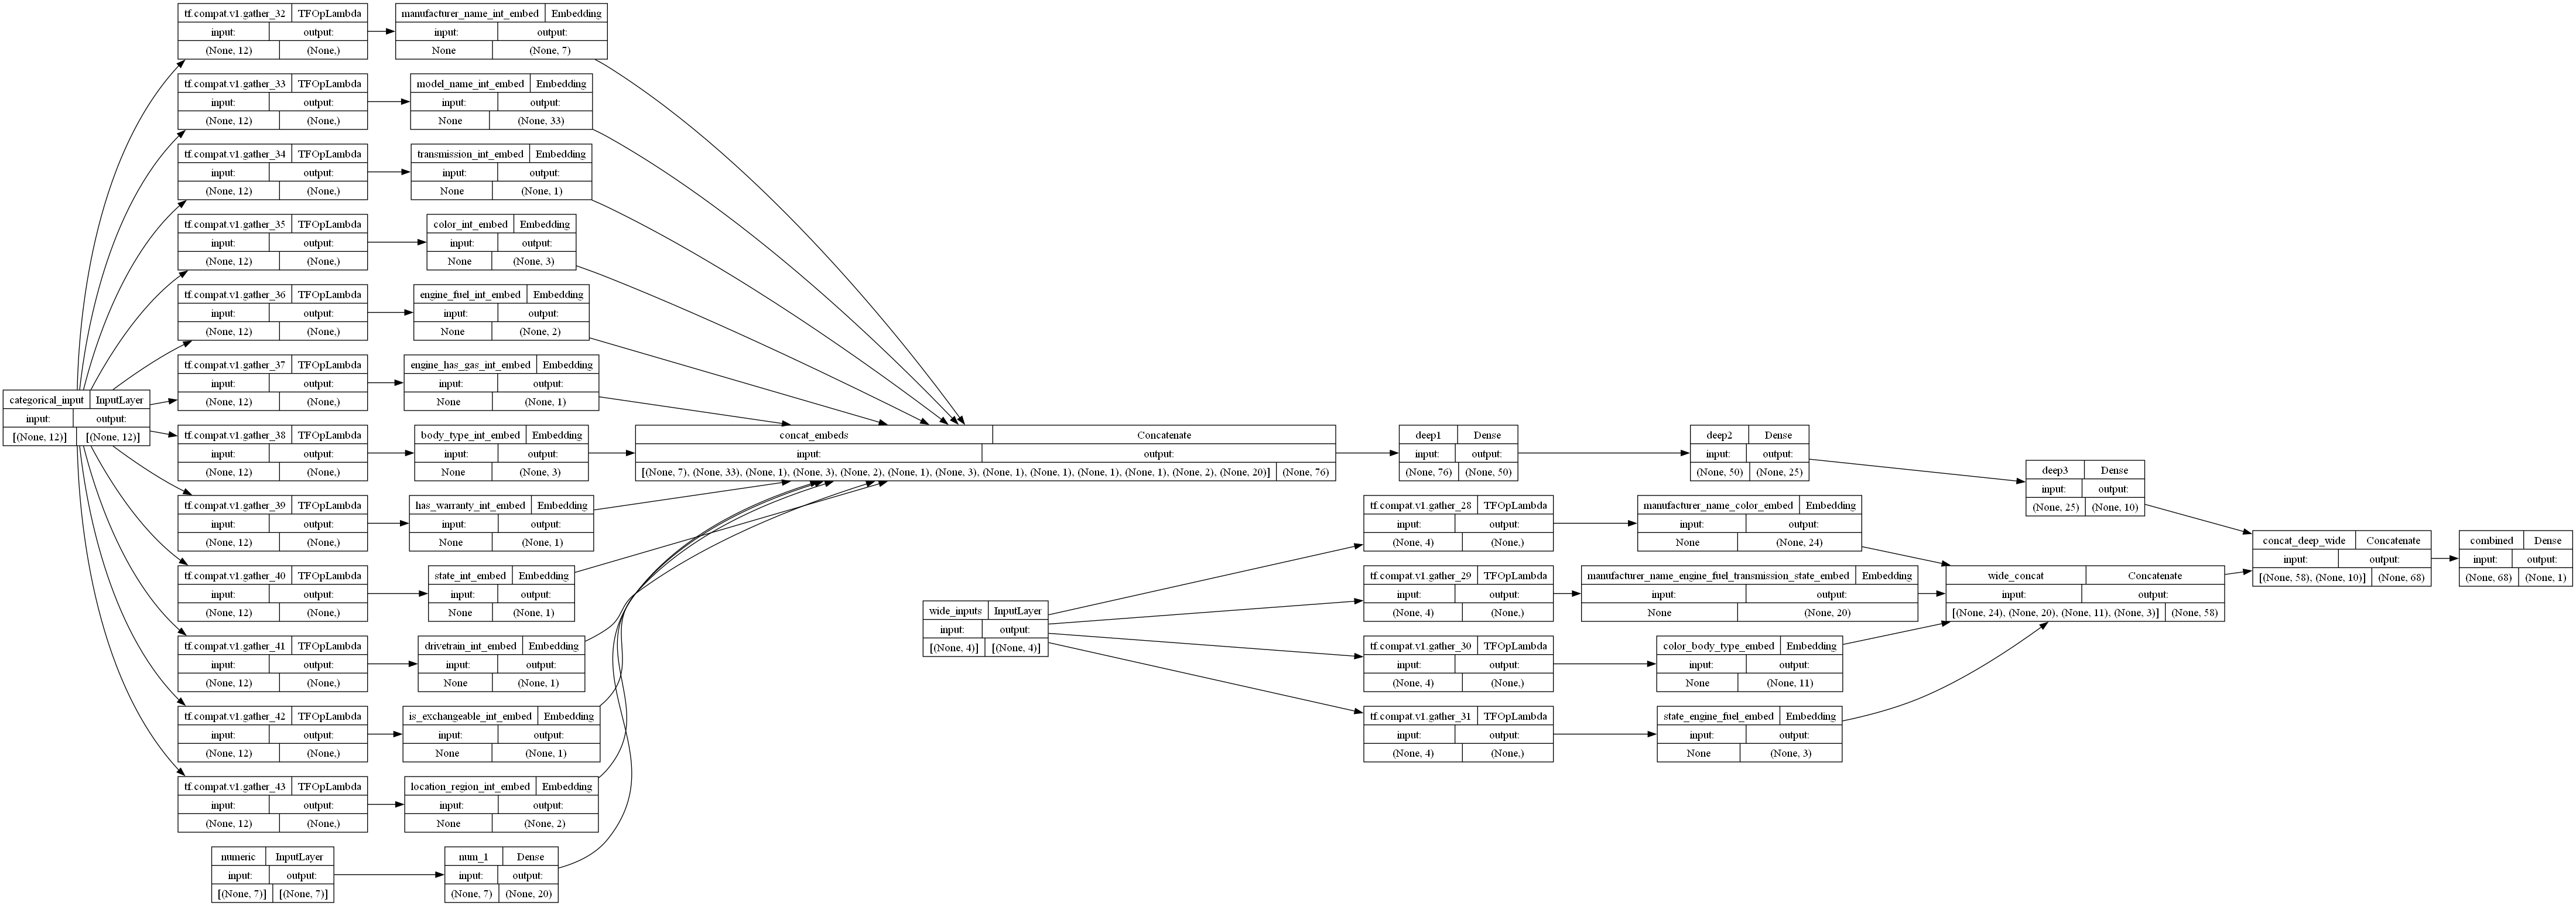

In [36]:
keras.utils.plot_model(model4, show_shapes=True, rankdir="LR")

In [38]:
%%time
history = model4.fit([X_train_crossed,X_train_cat,X_train_num],
                    y_train, 
                    epochs=15, 
                    batch_size=32, 
                    verbose=1, 
                    validation_data = ([X_test_crossed,X_test_cat,X_test_num],y_test))

Epoch 1/15
963/963 [==============================] - 2s 2ms/step - loss: 0.2010 - mean_absolute_error: 0.0843 - val_loss: 0.2152 - val_mean_absolute_error: 0.0944
Epoch 2/15
963/963 [==============================] - 2s 2ms/step - loss: 0.2010 - mean_absolute_error: 0.0843 - val_loss: 0.2152 - val_mean_absolute_error: 0.0944
Epoch 3/15
963/963 [==============================] - 2s 2ms/step - loss: 0.2010 - mean_absolute_error: 0.0843 - val_loss: 0.2152 - val_mean_absolute_error: 0.0944
Epoch 4/15
963/963 [==============================] - 2s 2ms/step - loss: 0.2010 - mean_absolute_error: 0.0843 - val_loss: 0.2152 - val_mean_absolute_error: 0.0944
Epoch 5/15
963/963 [==============================] - 2s 2ms/step - loss: 0.2010 - mean_absolute_error: 0.0843 - val_loss: 0.2152 - val_mean_absolute_error: 0.0944
Epoch 6/15
963/963 [==============================] - 2s 2ms/step - loss: 0.2010 - mean_absolute_error: 0.0843 - val_loss: 0.2152 - val_mean_absolute_error: 0.0944
Epoch 7/15
963/9

In [39]:
yhat = model4.predict([X_test_crossed,X_test_cat,X_test_num])
mse = mean_squared_error(y_test, yhat)
mae = mean_absolute_error(y_test, yhat)
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

241/241 [==============================] - 0s 956us/step
Mean Squared Error: 0.21515588177586817
Mean Absolute Error: 0.09435793211652718


Text(0.5, 0, 'epochs')

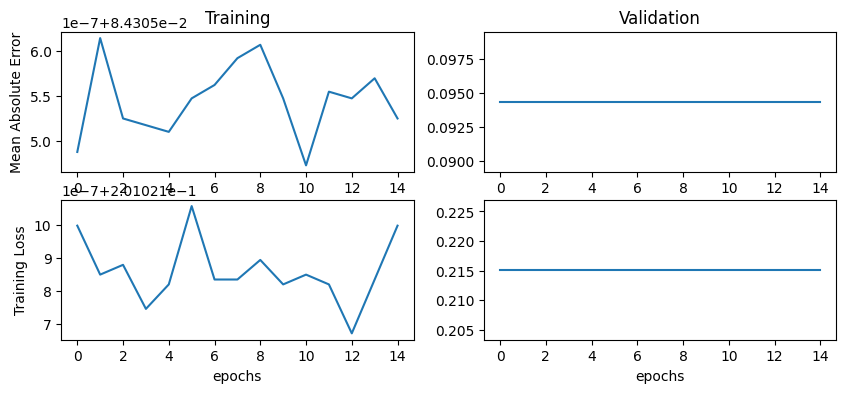

In [40]:
from matplotlib import pyplot as plt

%matplotlib inline

plt.figure(figsize=(10,4))
plt.subplot(2,2,1)
plt.plot(history.history['mean_absolute_error'])  # Use 'mean_absolute_error' instead of 'accuracy'

plt.ylabel('Mean Absolute Error')
plt.title('Training')
plt.subplot(2,2,2)
plt.plot(history.history['val_mean_absolute_error'])  # Use 'val_mean_absolute_error' instead of 'val_accuracy'
plt.title('Validation')

plt.subplot(2,2,3)
plt.plot(history.history['loss'])
plt.ylabel('Training Loss')
plt.xlabel('epochs')

plt.subplot(2,2,4)
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')

## MODEL 5: COMBINING EXTRA STEPS FROM MODEL 1 TO MODEL 4

In [41]:
# get crossed columns
X_train_crossed = df_train[cross_col_df_names].to_numpy()
X_test_crossed = df_test[cross_col_df_names].to_numpy()

# save categorical features
X_train_cat = df_train[categorical_headers_ints].to_numpy() 
X_test_cat = df_test[categorical_headers_ints].to_numpy() 

# and save off the numeric features
X_train_num =  df_train[numeric_headers].to_numpy()
X_test_num = df_test[numeric_headers].to_numpy()


# we need to create separate lists for each branch
crossed_outputs = []

# CROSSED DATA INPUT
input_crossed = Input(shape=(X_train_crossed.shape[1],), dtype='int64', name='wide_inputs')
for idx,col in enumerate(cross_col_df_names):
    
    # track what the maximum integer value will be for this variable
    # which is the same as the number of categories
    N = max(df_train[col].max(),df_test[col].max())+1
    N = len(encoders[col].classes_)
    N_reduced = int(np.sqrt(N))
    
    
    # this line of code does this: input_branch[:,idx]
    x = tf.gather(input_crossed, idx, axis=1)
    
    # now use an embedding to deal with integers as if they were one hot encoded
    x = Embedding(input_dim=N, 
                  output_dim=N_reduced, 
                  input_length=1, name=col+'_embed')(x)
    
    # save these outputs to concatenate later
    crossed_outputs.append(x)
    

# now concatenate the outputs and add a fully connected layer
wide_branch = concatenate(crossed_outputs, name='wide_concat')

# reset this input branch
all_deep_branch_outputs = []

# CATEGORICAL DATA INPUT
input_cat = Input(shape=(X_train_cat.shape[1],), dtype='int64', name='categorical_input')
for idx,col in enumerate(categorical_headers_ints):
    
    # track what the maximum integer value will be for this variable
    # which is the same as the number of categories
    N = max(df_train[col].max(),df_test[col].max())+1
    N_reduced = int(np.sqrt(N))
    
    # this line of code does this: input_branch[:,idx]
    x = tf.gather(input_cat, idx, axis=1)
    
    # now use an embedding to deal with integers as if they were one hot encoded
    x = Embedding(input_dim=N, 
                  output_dim=N_reduced, 
                  input_length=1, name=col+'_embed')(x)
    
    # save these outputs to concatenate later
    all_deep_branch_outputs.append(x)
    
# NUMERIC DATA INPUT
# create dense input branch for numeric
input_num = Input(shape=(X_train_num.shape[1],), name='numeric')
x_dense = Dense(units=20, activation='relu',name='num_1')(input_num)
    
all_deep_branch_outputs.append(x_dense)


# merge the deep branches together
deep_branch = concatenate(all_deep_branch_outputs,name='concat_embeds')
deep_branch = Dense(units=50,activation='relu', name='deep1')(deep_branch)
deep_branch = Dense(units=25,activation='relu', name='deep2')(deep_branch)
deep_branch = Dense(units=10,activation='relu', name='deep3')(deep_branch)
    
# merge the deep and wide branch
branch = concatenate([wide_branch, deep_branch],
                           name='concat_deep_wide')

#new layers from my previous model
x = Dense(units=256, activation='relu')(branch) #increases width
x = BatchNormalization()(x)
x = Dense(units=128, activation='relu')(x)  #increases width
x = Dropout(0.3)(x)
x = Dense(units=64, activation='relu', kernel_regularizer=l2(0.01))(x)  #increases width

final_output = Dense(units=1, name='output')(x)

model5 = Model(inputs=[input_crossed,input_cat,input_num], outputs=final_output)

#Define a learning rate schedule
initial_learning_rate = 0.01
lr_schedule = ExponentialDecay(
    initial_learning_rate, decay_steps=100, decay_rate=0.9
)
optimizer5 = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
model5.compile(optimizer=optimizer5,
              loss='mean_squared_error',
              metrics=[MeanAbsoluteError()])

model5.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 categorical_input (InputLa  [(None, 12)]                 0         []                            
 yer)                                                                                             
                                                                                                  
 tf.compat.v1.gather_48 (TF  (None,)                      0         ['categorical_input[0][0]']   
 OpLambda)                                                                                        
                                                                                                  
 tf.compat.v1.gather_49 (TF  (None,)                      0         ['categorical_input[0][0]']   
 OpLambda)                                                                                  

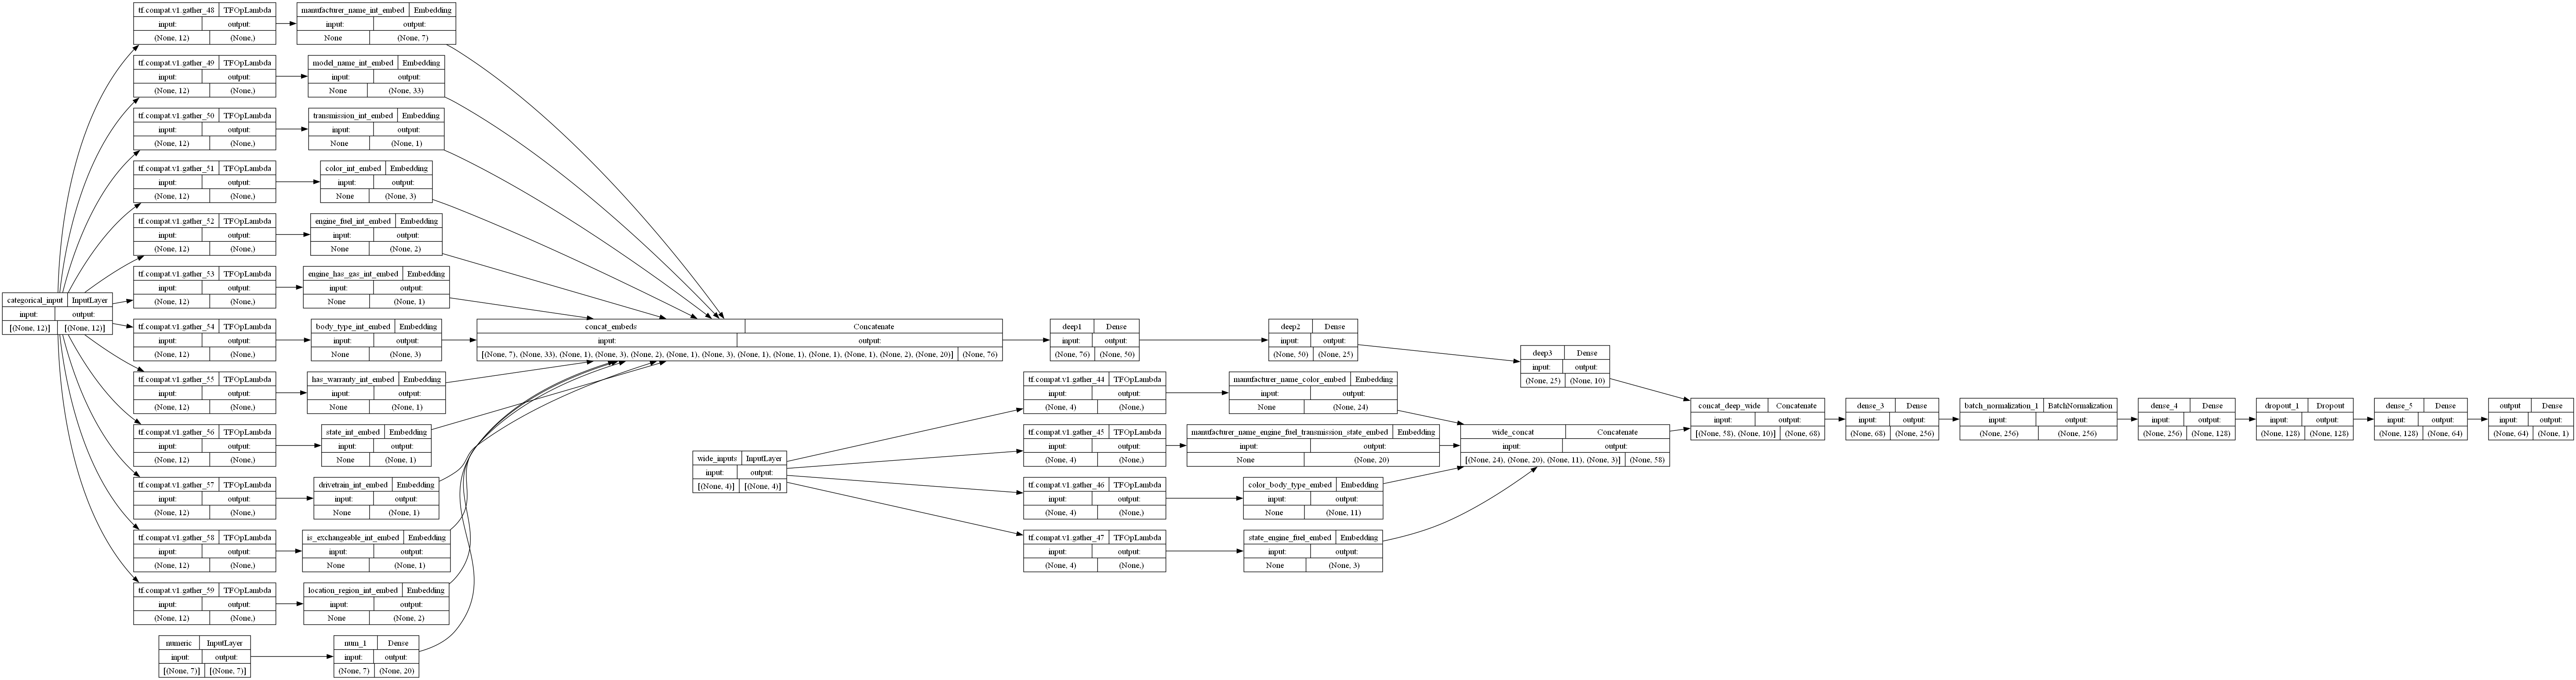

In [42]:
keras.utils.plot_model(model5, show_shapes=True, rankdir="LR")

In [44]:
%%time
history = model5.fit([X_train_crossed,X_train_cat,X_train_num],
                    y_train, 
                    epochs=15, 
                    batch_size=32, 
                    verbose=1, 
                    validation_data = ([X_test_crossed,X_test_cat,X_test_num],y_test))

Epoch 1/15
963/963 [==============================] - 3s 3ms/step - loss: 0.0374 - mean_absolute_error: 0.0703 - val_loss: 0.0546 - val_mean_absolute_error: 0.0744
Epoch 2/15
963/963 [==============================] - 3s 3ms/step - loss: 0.0272 - mean_absolute_error: 0.0558 - val_loss: 0.0310 - val_mean_absolute_error: 0.0549
Epoch 3/15
963/963 [==============================] - 3s 3ms/step - loss: 0.0230 - mean_absolute_error: 0.0495 - val_loss: 0.0233 - val_mean_absolute_error: 0.0470
Epoch 4/15
963/963 [==============================] - 3s 3ms/step - loss: 0.0208 - mean_absolute_error: 0.0453 - val_loss: 0.0226 - val_mean_absolute_error: 0.0489
Epoch 5/15
963/963 [==============================] - 3s 3ms/step - loss: 0.0199 - mean_absolute_error: 0.0441 - val_loss: 0.0205 - val_mean_absolute_error: 0.0446
Epoch 6/15
963/963 [==============================] - 3s 3ms/step - loss: 0.0192 - mean_absolute_error: 0.0427 - val_loss: 0.0205 - val_mean_absolute_error: 0.0449
Epoch 7/15
963/9

In [45]:
yhat = model5.predict([X_test_crossed,X_test_cat,X_test_num])
mse = mean_squared_error(y_test, yhat)
mae = mean_absolute_error(y_test, yhat)
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

241/241 [==============================] - 0s 1ms/step
Mean Squared Error: 0.019347843109571165
Mean Absolute Error: 0.044948403018005165


Text(0.5, 0, 'epochs')

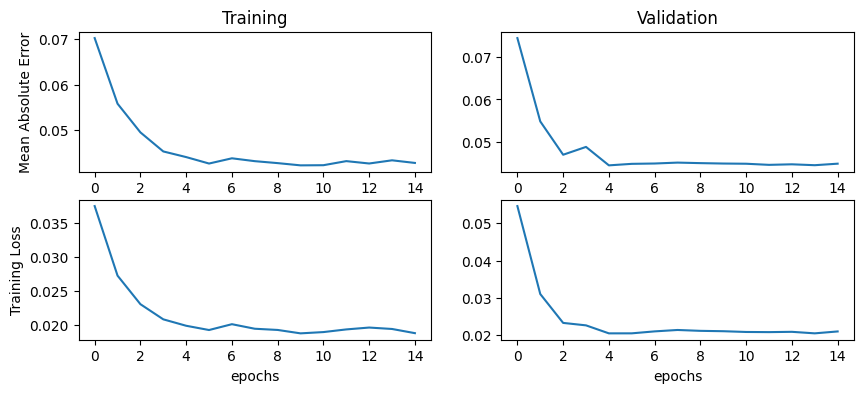

In [46]:
from matplotlib import pyplot as plt

%matplotlib inline

plt.figure(figsize=(10,4))
plt.subplot(2,2,1)
plt.plot(history.history['mean_absolute_error'])  # Use 'mean_absolute_error' instead of 'accuracy'

plt.ylabel('Mean Absolute Error')
plt.title('Training')
plt.subplot(2,2,2)
plt.plot(history.history['val_mean_absolute_error'])  # Use 'val_mean_absolute_error' instead of 'val_accuracy'
plt.title('Validation')

plt.subplot(2,2,3)
plt.plot(history.history['loss'])
plt.ylabel('Training Loss')
plt.xlabel('epochs')

plt.subplot(2,2,4)
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')

## EXTRA: Extracting Embedding Weights!

Extracting Embedding Weights from Crossed Columns:

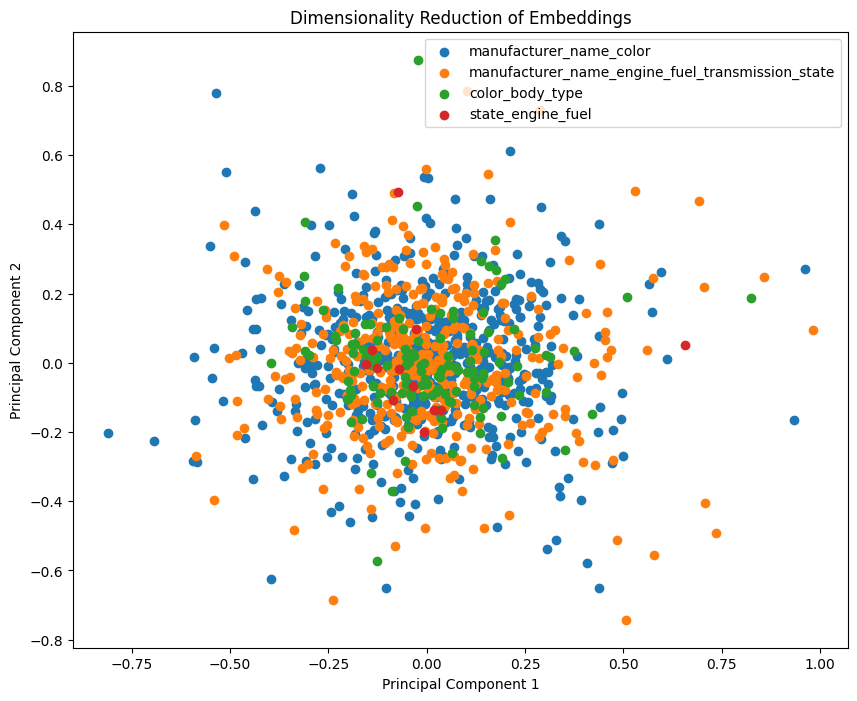

In [47]:
from sklearn.decomposition import PCA
#Extracting embedding weights from cross categorical columns
embedding_weights = []
for col in cross_col_df_names:
    embedding_layer = model5.get_layer(col+'_embed')
    weights = embedding_layer.get_weights()[0]
    embedding_weights.append(weights)

#PCA Dimensionality Reduction
pca = PCA(n_components=2)
reduced_embeddings = [pca.fit_transform(weights) for weights in embedding_weights]

#Visualizations
plt.figure(figsize=(10, 8))
for i, reduced_embedding in enumerate(reduced_embeddings):
    plt.scatter(reduced_embedding[:, 0], reduced_embedding[:, 1], label=cross_col_df_names[i])

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Dimensionality Reduction of Embeddings')
plt.legend()
plt.show()

## COMPARING TO A STANDARD MLP

In [97]:
# Now let's define the architecture for a multi-layer network
# First, lets setup the input size
X_train_mlp = np.concatenate((X_train_crossed, X_train_cat, X_train_num), axis=1)
X_test_mlp = np.concatenate((X_test_crossed,X_test_cat,X_test_num), axis=1)
input_tensor = Input(shape=(X_train_mlp.shape[1],))

# a layer instance is callable on a tensor, and returns a tensor
# Dense means a fully connected layer, with 10 hidden neurons and a bias term
x = Dense(units=256, activation='relu')(input_tensor)
x = Dense(units=128, activation='tanh')(x)
predictions = Dense(1, activation='sigmoid')(x)

# This creates a model that includes
# the Input layer and three Dense layers
modelMLP = Model(inputs=input_tensor, outputs=predictions)

#Define a learning rate schedule
initial_learning_rate = 0.1
lr_schedule = ExponentialDecay(
    initial_learning_rate, decay_steps=100, decay_rate=0.9
)
optimizerMLP = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
modelMLP.compile(optimizer=optimizerMLP,
              loss='mean_squared_error',
              metrics=[MeanAbsoluteError()])

In [99]:
%%time
history = modelMLP.fit(X_train_mlp,
                    y_train, 
                    epochs=15, 
                    batch_size=32, 
                    verbose=1, 
                    validation_data = (X_test_mlp,y_test))

Epoch 1/15
1926/1926 [==============================] - 3s 1ms/step - loss: 0.4821 - mean_absolute_error: 0.2042 - val_loss: 0.5117 - val_mean_absolute_error: 0.2164
Epoch 2/15
1926/1926 [==============================] - 2s 1ms/step - loss: 0.4821 - mean_absolute_error: 0.2042 - val_loss: 0.5117 - val_mean_absolute_error: 0.2164
Epoch 3/15
1926/1926 [==============================] - 2s 1ms/step - loss: 0.4821 - mean_absolute_error: 0.2042 - val_loss: 0.5117 - val_mean_absolute_error: 0.2164
Epoch 4/15
1926/1926 [==============================] - 2s 1ms/step - loss: 0.4821 - mean_absolute_error: 0.2042 - val_loss: 0.5117 - val_mean_absolute_error: 0.2164
Epoch 5/15
1926/1926 [==============================] - 2s 1ms/step - loss: 0.4821 - mean_absolute_error: 0.2042 - val_loss: 0.5117 - val_mean_absolute_error: 0.2164
Epoch 6/15
1926/1926 [==============================] - 2s 1ms/step - loss: 0.4821 - mean_absolute_error: 0.2042 - val_loss: 0.5117 - val_mean_absolute_error: 0.2164
Epoc